In [53]:
import pandas as pd
df = pd.read_csv('/content/Loan Prediction data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [55]:
df.shape

(614, 13)

In [56]:
df.index

RangeIndex(start=0, stop=614, step=1)

In [57]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
duplicated_count =df.duplicated().sum()
duplicated_count

0

In [60]:
df.count()

,0
Loan_ID,614
Gender,601
Married,611
Dependents,599
Education,614
Self_Employed,582
ApplicantIncome,614
CoapplicantIncome,614
LoanAmount,592
Loan_Amount_Term,600


In [61]:
df.isnull().sum() #Missing value analysis

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [62]:
df.describe() #Checking standard deviation for numerical values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Categorical distributions
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Data Cleaning
#Filling in missing values
df_cleaned = df.copy()
df_cleaned["LoanAmount"].fillna(df_cleaned["LoanAmount"].median(), inplace=True)
df_cleaned["Loan_Amount_Term"].fillna(df_cleaned["Loan_Amount_Term"].median(), inplace= True)
df_cleaned["Credit_History"].fillna(df_cleaned["Credit_History"].mode()[0], inplace=True)
df_cleaned["Gender"].fillna(df_cleaned["Gender"].mode()[0], inplace=True)
df_cleaned["Married"].fillna(df_cleaned["Married"].mode()[0], inplace=True)
df_cleaned["Dependents"].fillna(df_cleaned["Dependents"].mode()[0], inplace=True)
df_cleaned["Self_Employed"].fillna(df_cleaned["Self_Employed"].mode()[0], inplace=True)

#Verifying changes
df_cleaned.info(), df_cleaned.isnull().sum()

In [ ]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
# Selecting numerical features for scaling
num_features =  ["ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term", "Credit_History"]

#Applying MinMax Scaling
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])
#Displaying scaled data
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
#Selecting numerical values for scaling
num_features =  ["ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term", "Credit_History"]

 #Apply standard scaling
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

 #Display scaled data
df.head()

In [64]:
from scipy import stats  #Identifying and treating outliers
import numpy as np
#Selecting numerical columns for outlier detection
num_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term", "Credit_History"]
z_scores = stats.zscore(df[num_features].dropna())
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_no_outliers = df[filtered_entries]

print(f"Original data points: {len(df)}; After outlier removal: {len(df_no_outliers)}")

Original data points: 614; After outlier removal: 614


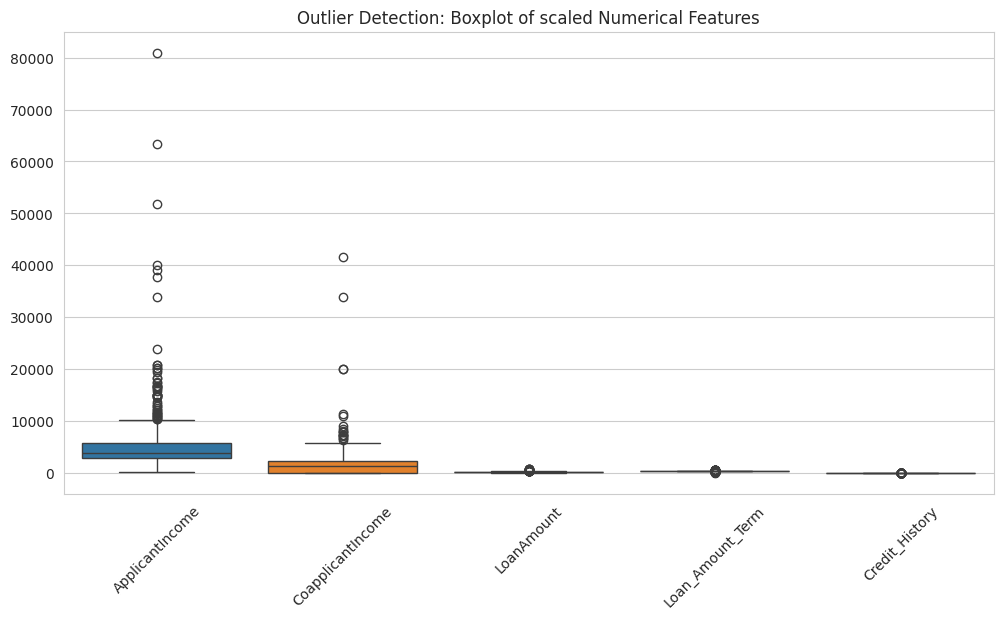

In [65]:
#plotting boxplots to visualize outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=45)
plt.title("Outlier Detection: Boxplot of scaled Numerical Features")
plt.show()

Text(0.5, 1.0, 'Boxplot After Outlier treatment')

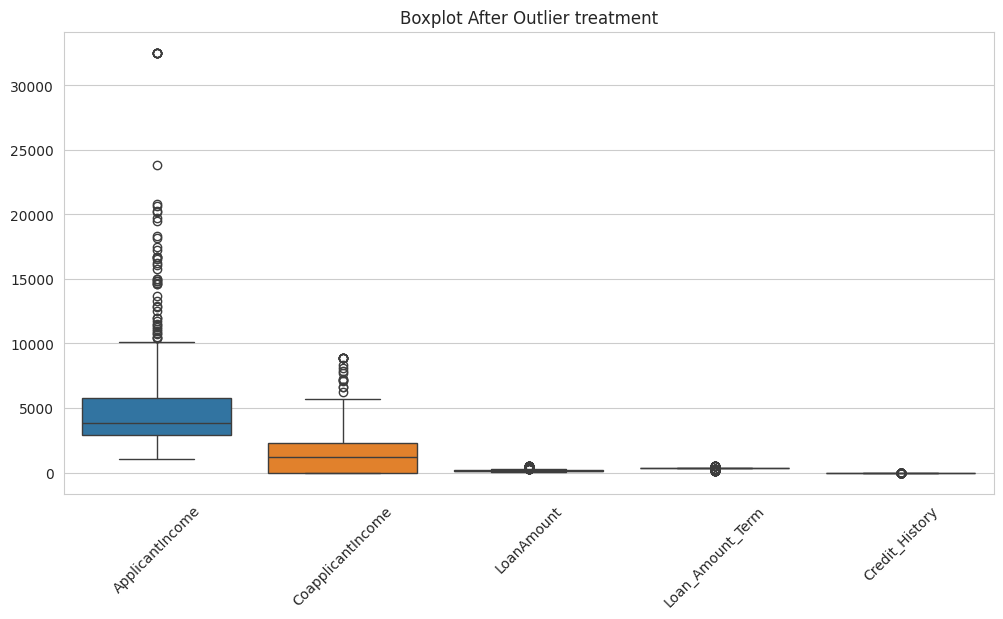

In [66]:
#Applying clipping per column to handle outliers
lower_bound = {}
upper_bound ={}
for column in num_features:
  lower_bound[column] = df[column].quantile(0.01)
  upper_bound[column] = df[column].quantile(0.99)
  df[column] = df[column].clip(lower_bound[column], upper_bound[column])

#Replotting boxplot to make sure outliers are treated
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier treatment")

In [67]:
#Feature Transformation
#Categorical data Encoding
from sklearn.preprocessing import LabelEncoder
#List of categorical features
cat_features = ["Loan_ID", "Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]

#Applying label encoding
encoder = LabelEncoder()
for col in cat_features:
 df[col] = encoder.fit_transform(df[col])
#Displaying transformed data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [68]:
#Creating new features based on existing ones
TotalIncome = df["ApplicantIncome"]+df["CoapplicantIncome"]
df["TotalIncome"] = TotalIncome
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,0,0,0,5849.0,0.0,NaN,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0,6091.0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1,3000.0
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1,4941.0
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1,6000.0


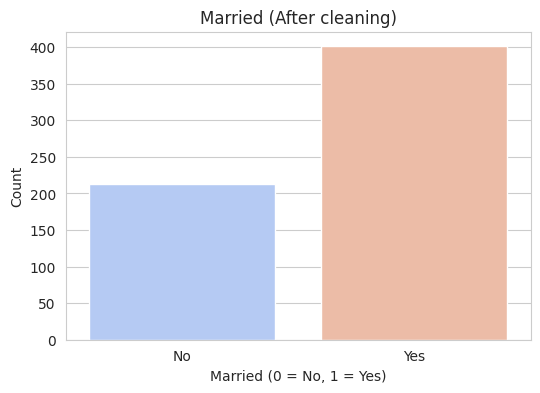

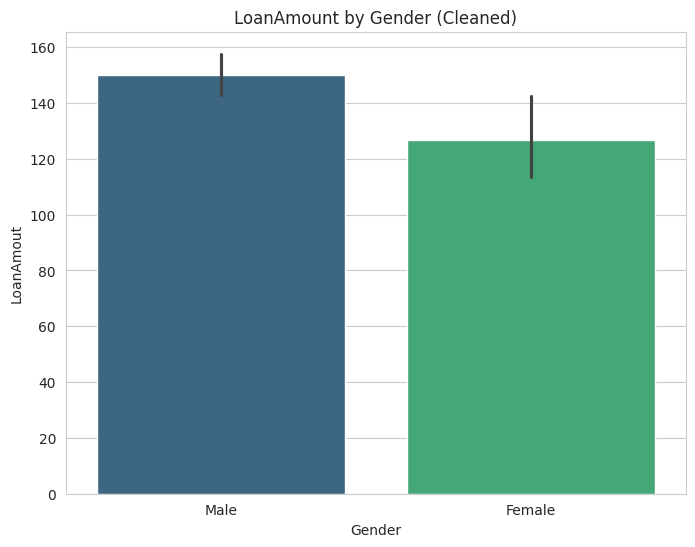

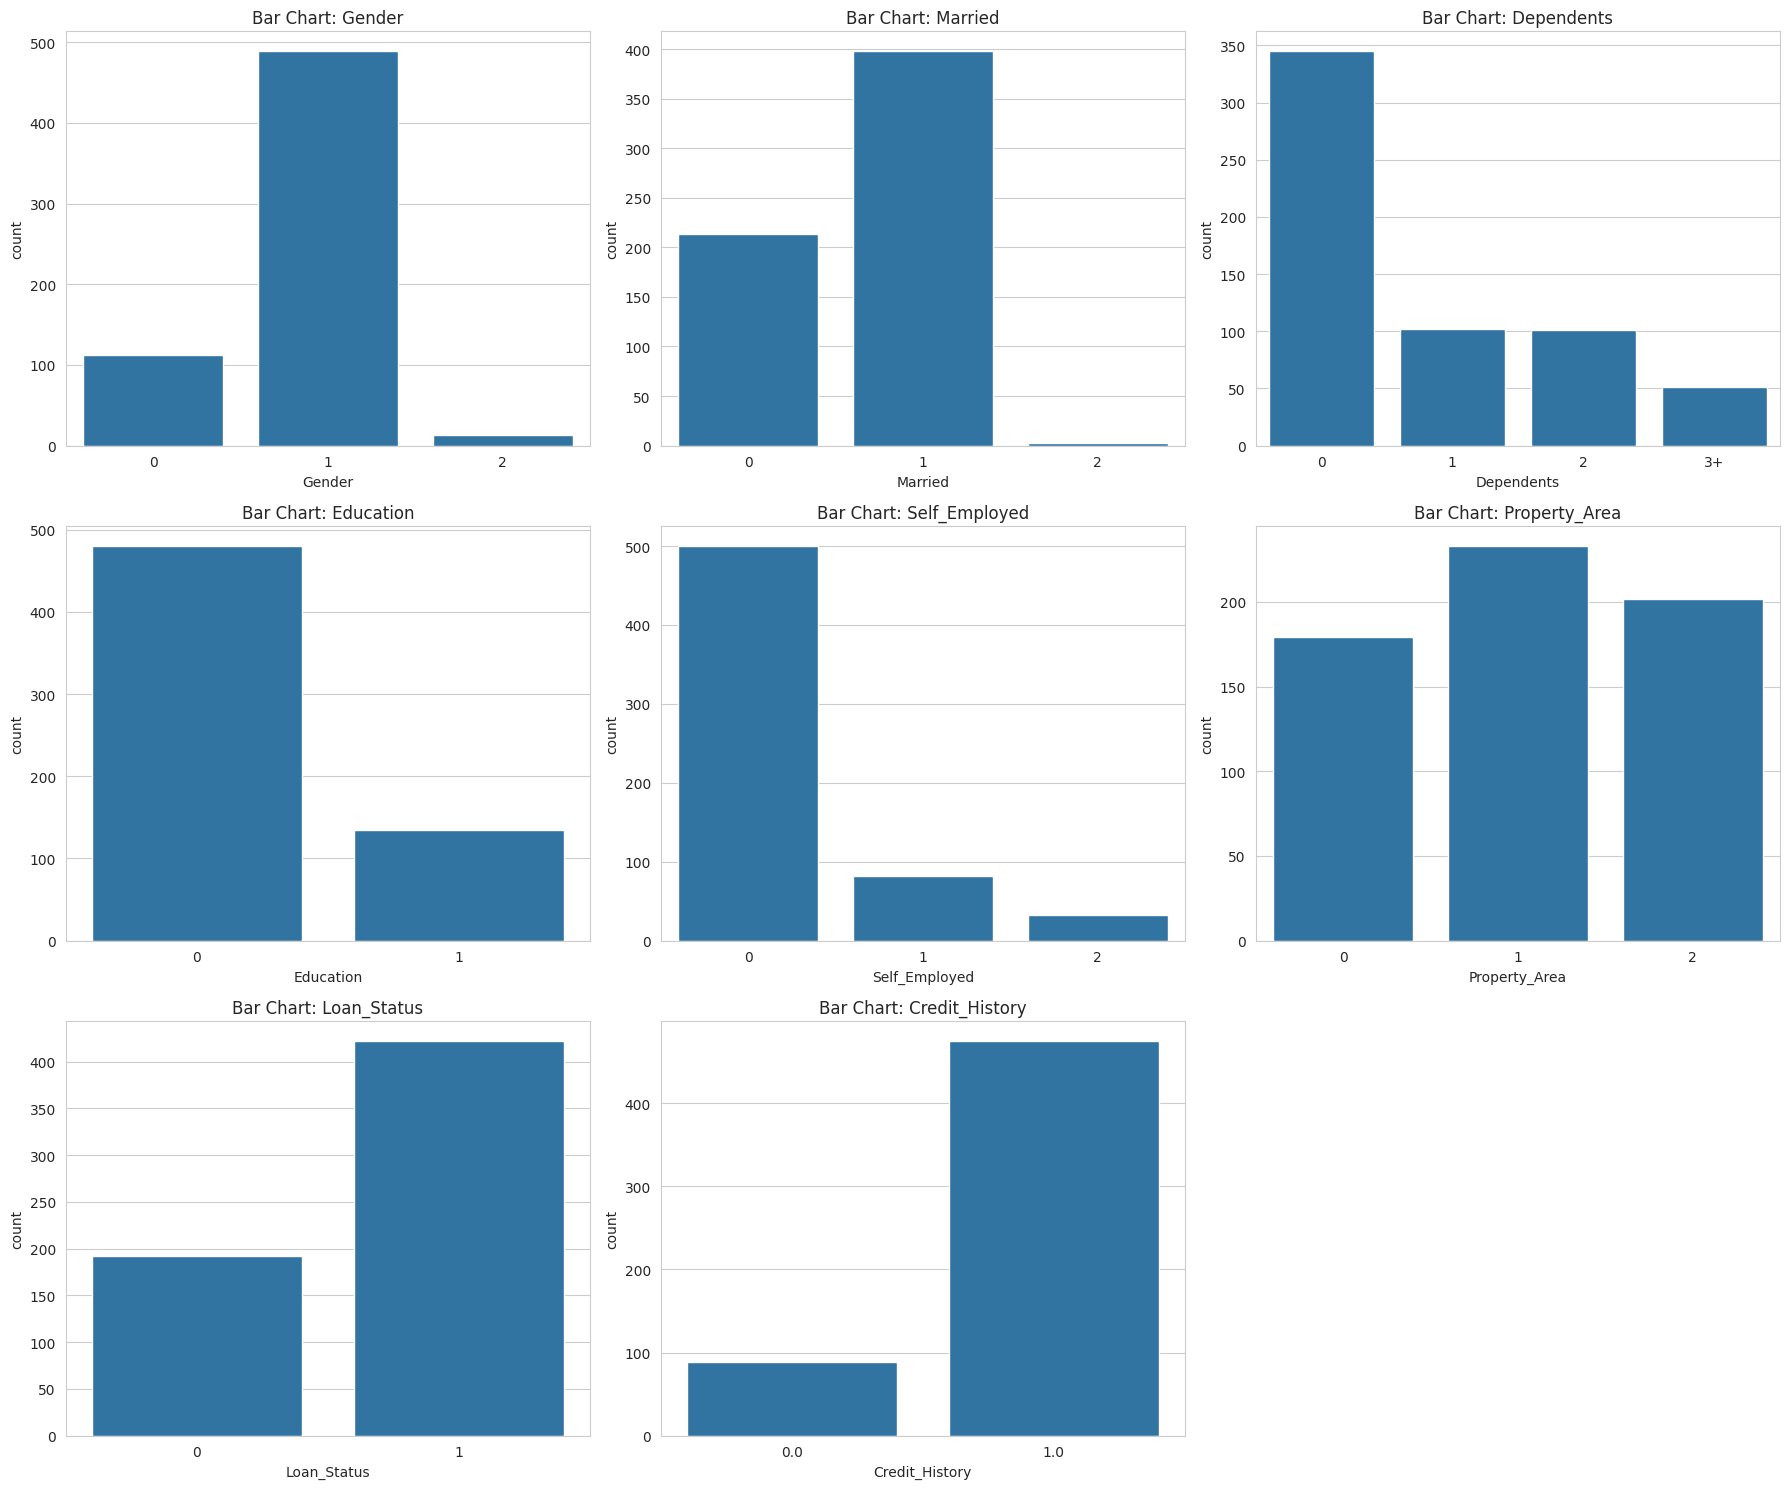

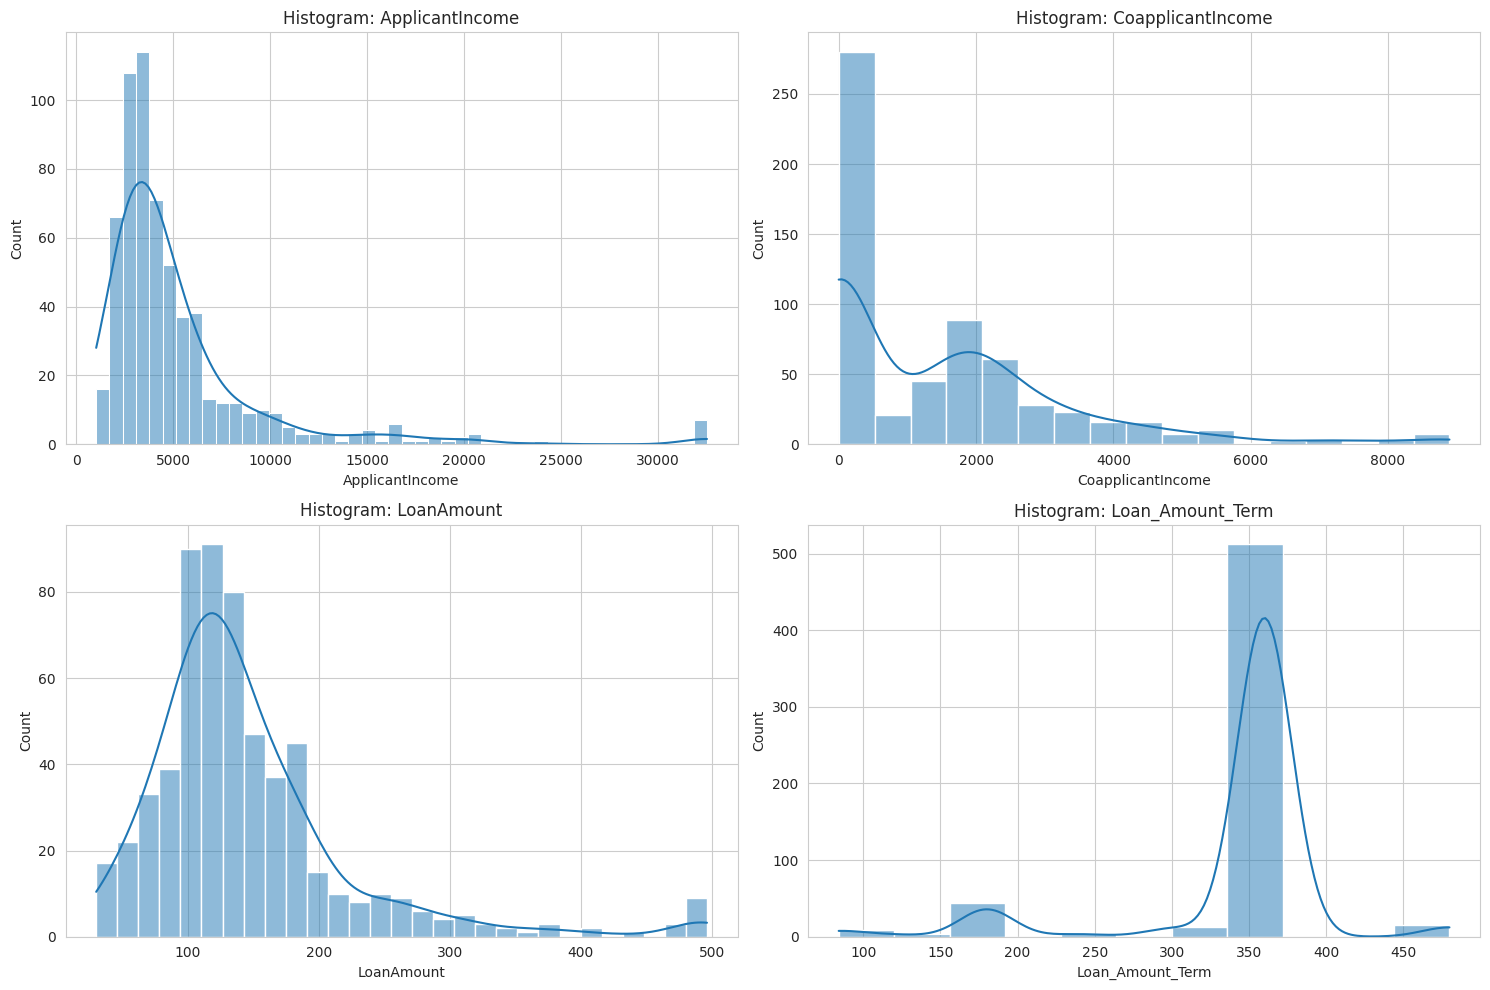

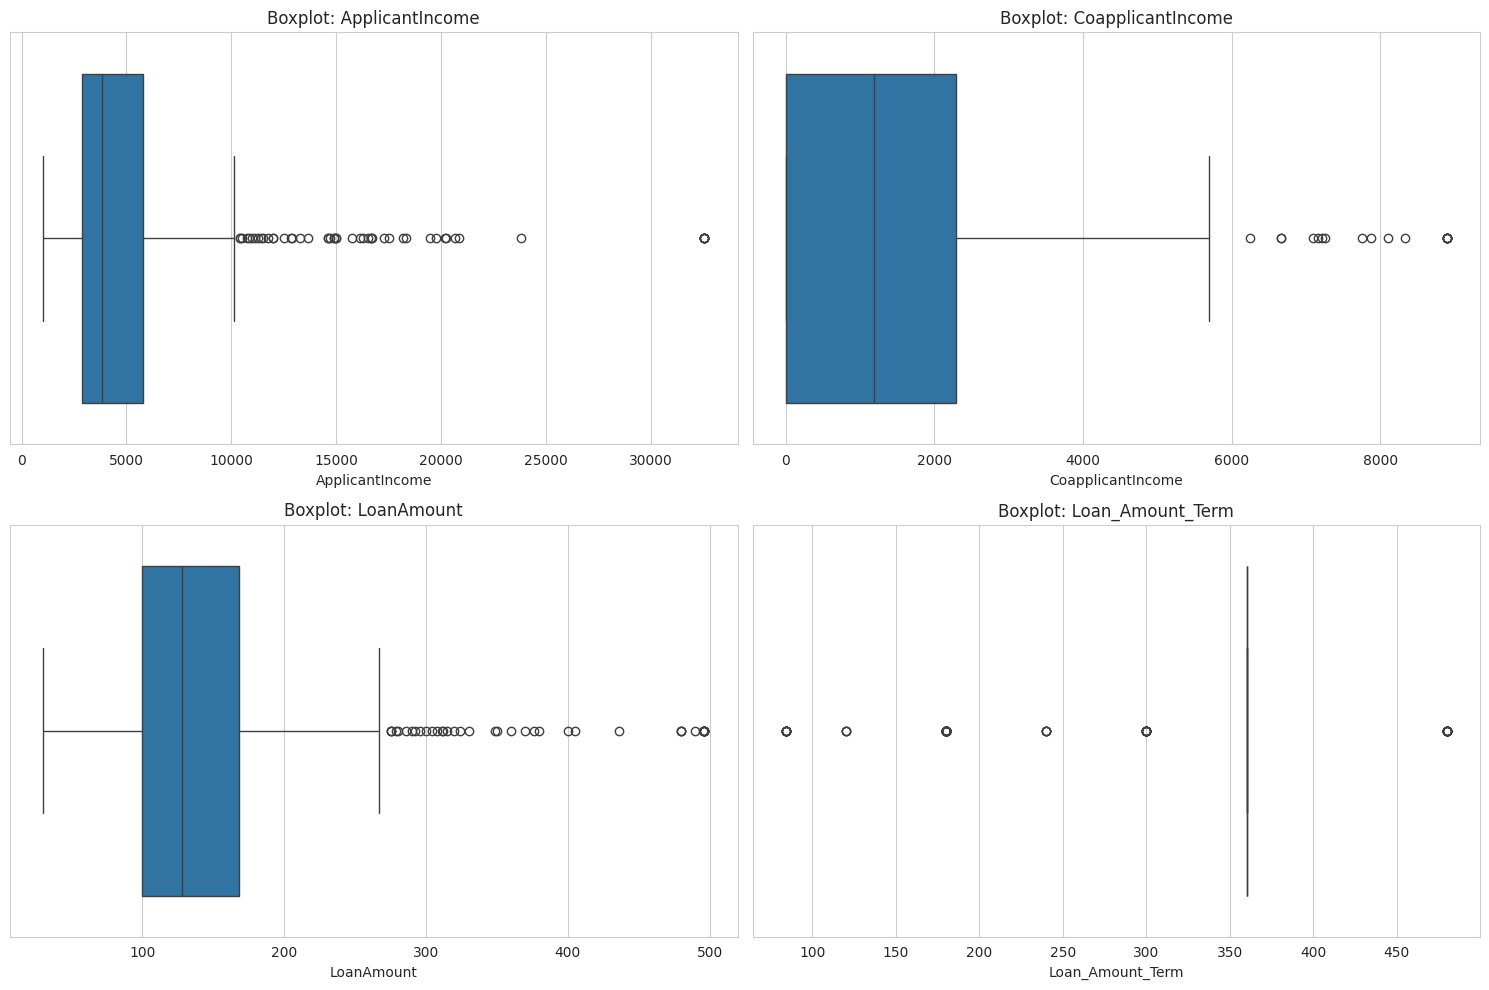

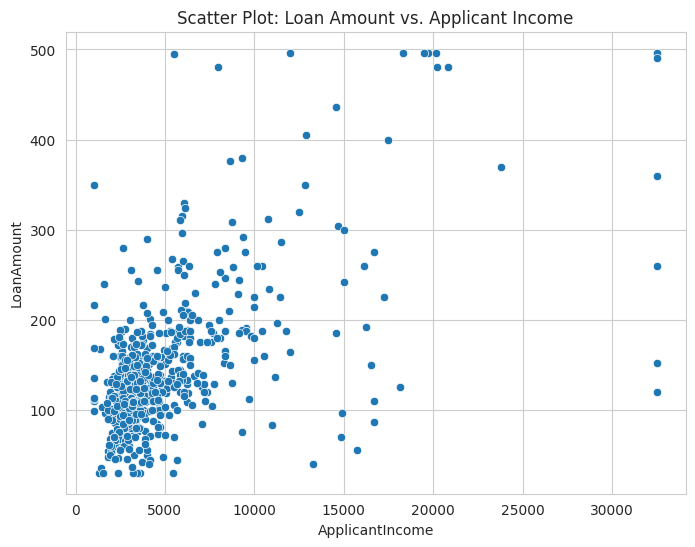


--- Credit History vs. Loan Status Crosstab ---
Loan_Status      0    1
Credit_History         
0.0             82    7
1.0             97  378


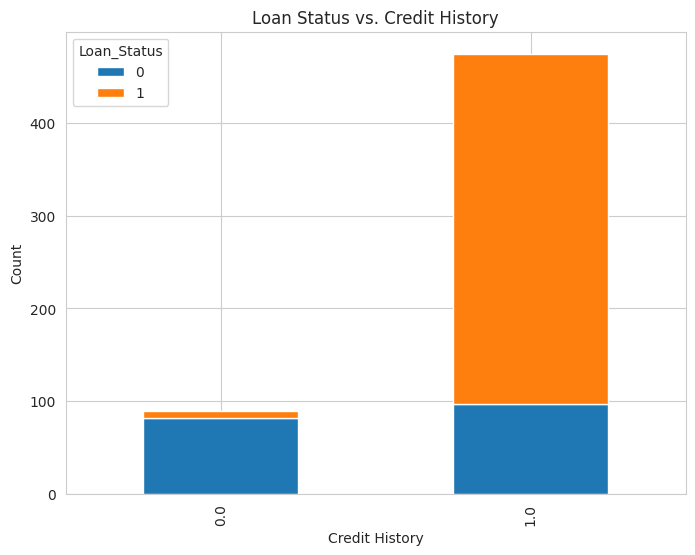

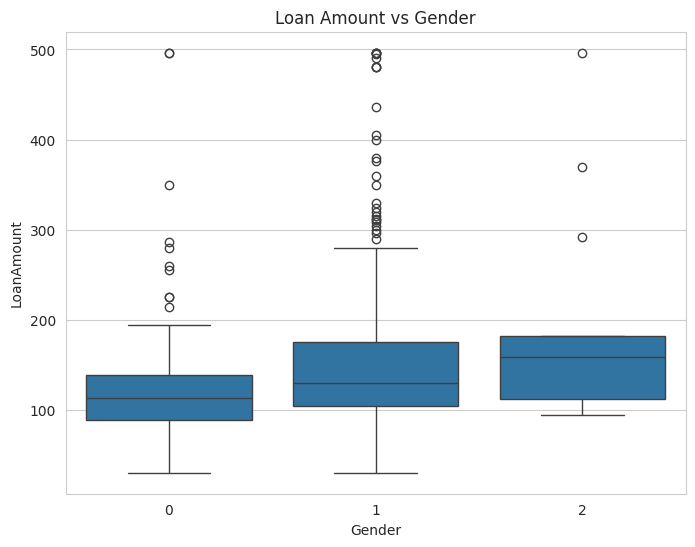

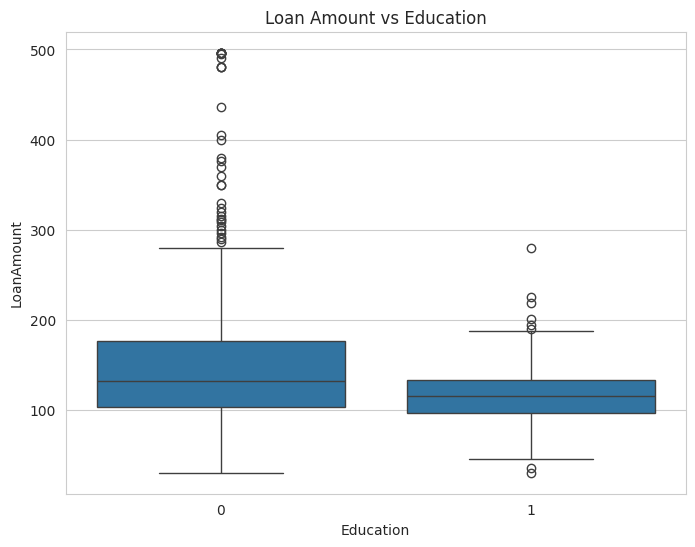

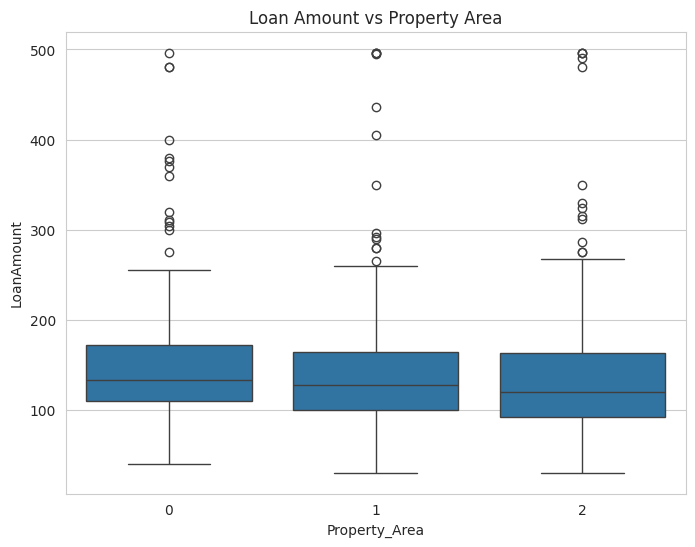

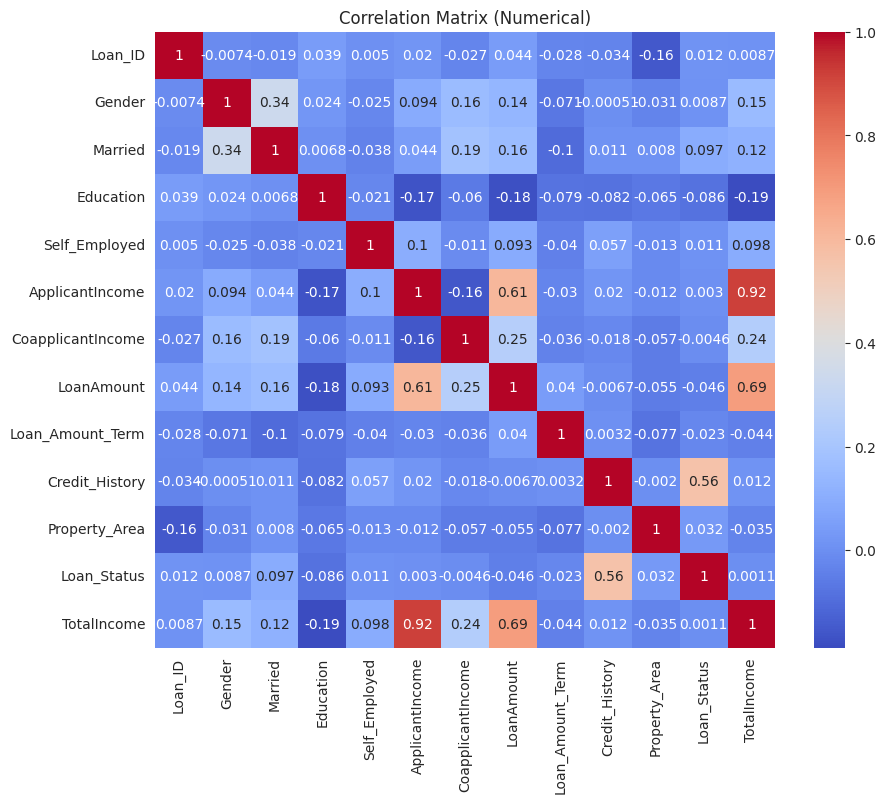

In [69]:
#Explotary Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Setting visualisation style
sns.set_style("whitegrid")
#Married Count After cleaning
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x="Married", palette="coolwarm")
plt.title("Married (After cleaning)")
plt.xlabel("Married (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#LoanAmount by Gender
plt.figure(figsize=(8,6))
sns.barplot(x="Gender", y="LoanAmount", data=df_cleaned, palette="viridis" )
plt.title("LoanAmount by Gender (Cleaned)")
plt.xlabel("Gender")
plt.ylabel("LoanAmout")
plt.show()

#Bar Charts (Categorical Features)
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Bar Chart: {feature}')
plt.tight_layout()
plt.show()

# Histograms (Numerical Features)
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram: {feature}')
plt.tight_layout()
plt.show()

# Boxplots (Numerical Features)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot: {feature}')
plt.tight_layout()
plt.show()

# Scatter Plot (Loan Amount vs. Applicant Income)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Scatter Plot: Loan Amount vs. Applicant Income')
plt.show()

# Loan Status vs. Credit History (Crosstab and Stacked Bar)
credit_loan_ct = pd.crosstab(df['Credit_History'], df['Loan_Status'])
print("\n--- Credit History vs. Loan Status Crosstab ---")
print(credit_loan_ct)

credit_loan_ct.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status vs. Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

#Loan amount vs gender boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='LoanAmount', data=df)
plt.title("Loan Amount vs Gender")
plt.show()

#Loan amount vs Education boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title("Loan Amount vs Education")
plt.show()

#Loan Amount vs Property Area boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Property_Area', y='LoanAmount', data=df)
plt.title("Loan Amount vs Property Area")
plt.show()

#Correlation Matrix (Numerical Features)
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical)')
plt.show()



In [70]:
#Part2 Probability and statistics
#
#Mean for numerical values
numerical_df = df.select_dtypes(include=np.number)
df_mean = numerical_df.mean()
print("Mean for numerical values:")
print(df_mean)

#Median for numerical
df_median = numerical_df.median()
print("\nMedian for numerical values:")
print(df_median)

#Mode for numerical values
df_mode = numerical_df.mode().iloc[0]
print("\nMode for numerical values:")
print(df_mode)

#Variance
df_variance = numerical_df.var()
print("\nVariance:")
print(df_variance)

#Standard deviation
df_std = numerical_df.std()
print("\Standard Deviation:")
print(df_std)

Mean for numerical values:
Loan_ID               306.500000
Gender                  0.838762
Married                 0.657980
Education               0.218241
Self_Employed           0.237785
ApplicantIncome      5214.577964
CoapplicantIncome    1483.654967
LoanAmount            145.409054
Loan_Amount_Term      342.360000
Credit_History          0.842199
Property_Area           1.037459
Loan_Status             0.687296
TotalIncome          6698.232932
dtype: float64

Median for numerical values:
Loan_ID               306.5
Gender                  1.0
Married                 1.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
Property_Area           1.0
Loan_Status             1.0
TotalIncome          5416.5
dtype: float64

Mode for numerical values:
Loan_ID                  0.00
Gender                   1.00
Married                  1.00
Ed

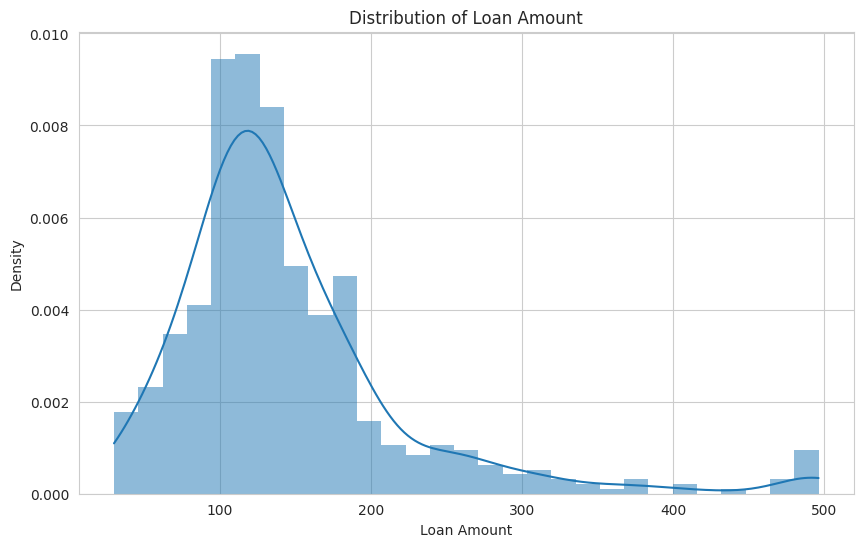

In [71]:
# Plotting histogram and probability density function
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True, stat="density", linewidth=0)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

In [72]:
from scipy.stats import chi2_contingency
# Correlation coefficients
correlation_matrix = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()
print("Correlation Coefficients:")
print(correlation_matrix)

# Hypothesis test (Chi-squared test)
contingency_table = pd.crosstab(df['Gender'], df['Loan_Status'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print("\nChi-squared Test:")
print("Contingency Table:")
print(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05  # Significance level
if p < alpha:
    print("The loan approval rate is dependent on applicant gender (reject null hypothesis).")
else:
    print("The loan approval rate is independent of applicant gender (fail to reject null hypothesis).")

Correlation Coefficients:
                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.159906    0.605546
CoapplicantIncome        -0.159906           1.000000    0.249573
LoanAmount                0.605546           0.249573    1.000000

Chi-squared Test:
Contingency Table:
Loan_Status    0    1
Gender               
0             37   75
1            150  339
2              5    8
Chi-squared statistic: 0.5558960103285638
P-value: 0.7573361980618397
The loan approval rate is independent of applicant gender (fail to reject null hypothesis).


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#Defining 'X' and 'y'
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Replacing '3+' in the 'Dependents' column
df['Dependents'] = df['Dependents'].astype(str).str.replace('+', '').astype(float)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Random Forest Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


# Explanation of Results and Possible Improvements
print("\nExplanation of Results:")
print(f"The Random Forest model achieved an accuracy of {accuracy:.4f} on the test set. This indicates the percentage of correctly predicted loan approvals.")
print("The classification report provides more detailed metrics: precision, recall, and F1-score for each class (approved '1' and not approved '0').")
print("These metrics help to understand the model's performance in terms of correctly identifying both loan approvals and rejections.")

print("\nPossible Improvements:")
print("- **Hyperparameter Tuning:** The default hyperparameters of the Random Forest model might not be optimal. Using techniques like GridSearchCV or RandomizedSearchCV to tune parameters such as 'n_estimators', 'max_depth', and 'min_samples_split' can potentially improve performance.")
print("- **Feature Engineering:** Creating new features or transforming existing ones could provide the model with more relevant information. For example, creating a feature 'TotalIncome' by summing 'ApplicantIncome' and 'CoapplicantIncome' might be beneficial.")
print("- **Handling Class Imbalance:** If the dataset has an imbalanced distribution of loan approvals and rejections, techniques like oversampling (e.g., SMOTE) or undersampling can be used to balance the classes.")
print("- **Cross-Validation:** Using cross-validation during model training and evaluation can provide a more robust estimate of the model's performance and reduce the risk of overfitting.")
print("- **Feature Importance:** Analyze feature importance to identify the most influential features and potentially remove less important ones, simplifying the model and improving its generalization.")
print("- **Ensemble Methods:** Explore other ensemble methods, like Gradient Boosting or XGBoost, which might yield better results. Stacking multiple models could also be explored.")
print("- **Error Analysis:** Analyze misclassified instances to understand the model's weaknesses and identify patterns that could be addressed.")
print("- **More Data:** If possible, obtaining more data can significantly improve model performance.")

Random Forest Model Results:
Accuracy: 0.7886
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123


Explanation of Results:
The Random Forest model achieved an accuracy of 0.7886 on the test set. This indicates the percentage of correctly predicted loan approvals.
The classification report provides more detailed metrics: precision, recall, and F1-score for each class (approved '1' and not approved '0').
These metrics help to understand the model's performance in terms of correctly identifying both loan approvals and rejections.

Possible Improvements:
- **Hyperparameter Tuning:** The default hyperparameters of the Random Forest model might not be optimal. Using techniques like GridSearchCV or 